In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_img(path, ratio=0.25, show=True):
    im = cv2.imread(path)

    h,w = im.shape[0:2]

    im = cv2.resize(im, dsize=(int(w*ratio), int(h*ratio)))

    im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

    if show:
        import matplotlib.pyplot as plt

        print im.shape

        # figsize=(width, height)
        plt.figure(figsize=(10,6))
        for idx,title in enumerate('Hue Saturation Value'.split()):
            plt.subplot(131+idx)
            plt.imshow(im[:,:,idx])
            plt.axis('off')
            plt.title(title)

        plt.show()
        
    return im

# im = load_img('./a.jpg')

def imadd(img, subplot):
    plt.subplot(subplot)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.axis('off')
    
def imshow():
    plt.show()

(1456, 819)


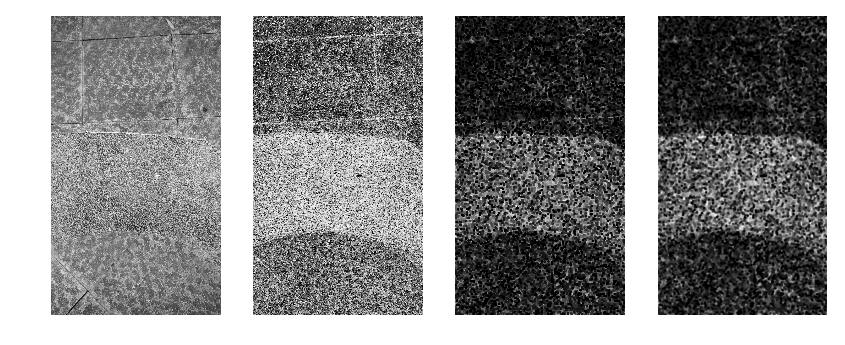

In [14]:
im = load_img('./238.jpg', ratio=0.35, show=False)

v = im[:,:,2]
print v.shape
dx, dy = np.gradient(v)

g = (dx**2 + dy**2)**0.5

plt.figure(figsize=(10,15))
imadd(v, 141)


g = g/g.max()*255

core = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
g = cv2.erode(g, core)

g = g.astype(dtype=np.uint8)
g = cv2.equalizeHist(g)

imadd(g, 142)

core = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
g = cv2.erode(g, core)

imadd(g, 143)

g = cv2.medianBlur(g, 5) 
g = cv2.GaussianBlur(g, (11,11), 0)

imadd(g,144)

imshow()


